In [21]:
array_Token = []
array_Length = []
array_CPI = []
file_size = 0
count = 0

with open("C:\\Users\\hooje\\ADB Python Kod\\CPIs\\test.bin", mode="rb") as file:
    while(count < 512):
        file.read(18)

        for i in range(256):
            byte = file.read(24)

            tempArr_Token = []
            tempArr_Length = []
            tempArr_CPI = []

            Token = byte[:4].hex()
            Length = byte[4:8].hex()
            CPI = byte[8:].hex()

            for i in range(4):
                tempArr_Token.append(Token[(i*2):((i*2)+2)])
                tempArr_Length.append(Length[(i*2):((i*2)+2)])

            for i in range(16):
                tempArr_CPI.append(CPI[(i*2):((i*2)+2)])

            array_Token.append(tempArr_Token)
            array_Length.append(tempArr_Length)
            array_CPI.append(tempArr_CPI)
        count = count + 1
    #print(array_Token)
    #print("-------------")
    #print(array_Length)
    #print("-------------")
    #print(array_CPI)
    print("Klar")

Klar


In [2]:
mean_array = []

for i in range(len(array_CPI)):
    sum_of_CPI = 0
    for j in range(len(array_CPI[i])):
        sum_of_CPI += int(array_CPI[i][j], 16)
    sum_of_CPI = int(sum_of_CPI/16)
    mean_array.append(hex(sum_of_CPI))
#print(mean_array)
print("Klar")

Klar


In [3]:
from PIL import Image

rows = 512
cols = 256

# create a new image, in the correct size
im = Image.new('RGB', (rows, cols))

# convert to RGB tuples - for now we're just showing an image of different shades of red.
grid = [(int(str(x), 16), 0, 255) for x in mean_array]

# using putdata we apply the values in the tuples from top left to bottom right
im.putdata(grid)
im.save('15_19_59.0774.jpg')
print("Klar")

Klar


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


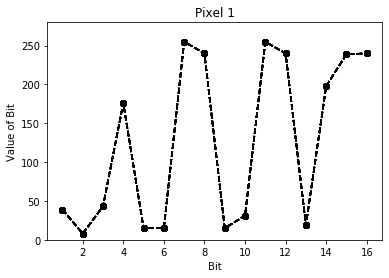

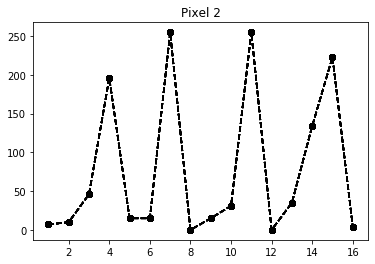

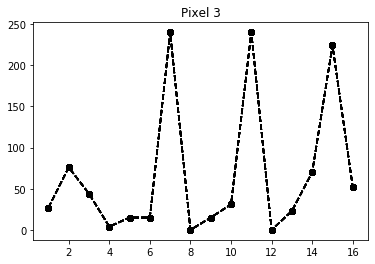

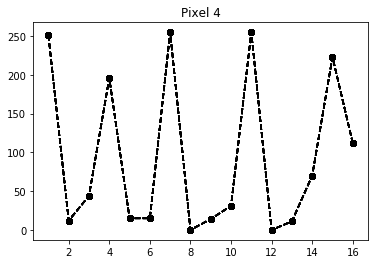

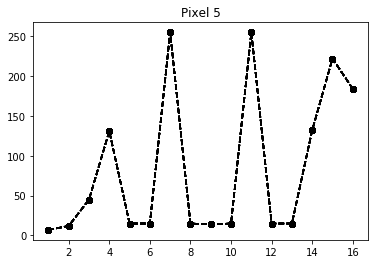

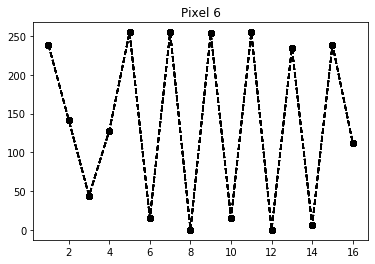

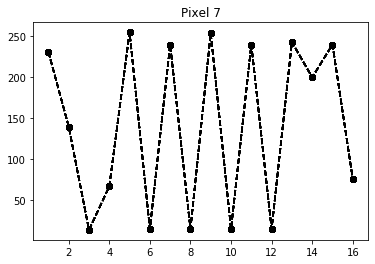

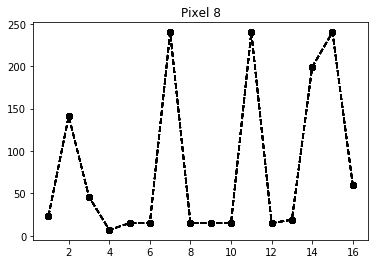

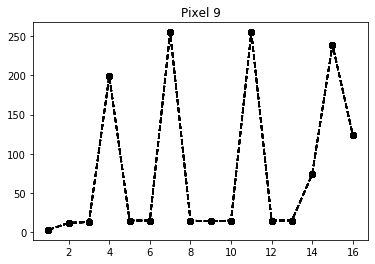

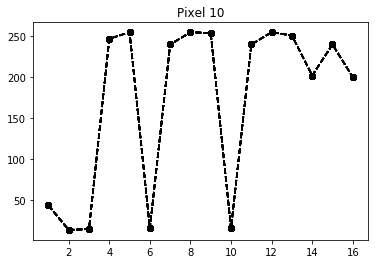

In [50]:
#To plot the signal in each pixel

import matplotlib.pyplot as plt
fig = plt.figure()

x = []

for i in range(16):
    x.append(i+1)

plt.xlabel("Bit")
plt.ylabel("Value of Bit")
plt.ylim(0, 280)

for i in range(10):
    c = []
    for a in range(len(array_CPI[i])):
        c.append(int(array_CPI[i][a], 16))
    for cpi in range(len(array_CPI[i])):
        plt.plot(x, c, '--ok' )
        plt.title("Pixel %s" % (i+1))
    plt.show()

In [7]:
#To plot the digital signal in each pixel

import matplotlib.pyplot as plt
fig = plt.figure()

x = []

for i in range(16):
    x.append(i+1)

plt.xlabel("Bit")
plt.ylabel("Value of Bit")
#plt.ylim(0, 280)

signal = []

for i in range(100):
    c = []
    for a in range(len(array_CPI[i])):
        if(int(array_CPI[i][a], 16) <= 127):
            c.append(0)
#        elif(int(array_CPI[i][a], 16) >= 180):
#            c.append(1)
        else:
#            print("Weird")
            c.append(1)
    for cpi in range(len(array_CPI[i])):
        plt.step(x, c, 'r', linewidth = 2, where='post')
        plt.title("Pixel %s" % (i+1))
        
    plt.savefig('C:\\Users\\hooje\\ADB Python Kod\\plots\\Pixel%s.png' % (i+1))
    #plt.show()
    plt.clf()

0001001100110111
0001001000100110
0000001000100010


<Figure size 432x288 with 0 Axes>

In [22]:
from PIL import Image
#################################################################
#To plot the digital signal in each pixel

#import matplotlib.pyplot as plt

signal = []

for i in range(131072):
    c = []
    for a in range(len(array_CPI[i])):
        if(int(array_CPI[i][a], 16) <= 127):
            c.append(0)
        else:
            c.append(1)
        
    temp = ""
    for v in range(len(c)):
        temp = temp + str(c[v])
    num = int(temp,2)
    #print("%d" % num)
    
    #20185
    
    if(num < 20185):
        signal.append(0)
    elif(num > 20185 & num < 46260):
        signal.append(128)
    else:
        signal.append(255)

#########################################################################
rows = 512
cols = 256

# create a new image, in the correct size
im = Image.new('RGB', (rows, cols))

# convert to RGB tuples - for now we're just showing an image of different shades of red.

grid = [(x, 0, 255) for x in signal]

#grid = [(int(int(str(x), 2)**(1/2)), int(int(str(x), 2)**(1/2)), 255) for x in signal]

#grid = [(int(str(x[:4]), 2), int(str(x[4:8]), 2), 255) for x in signal]

# using putdata we apply the values in the tuples from top left to bottom right
im.putdata(grid)
im.save('testbin.jpg')
print("Klar")

Klar
